# Feature Engineering

This notebook applies feature engineering steps using our modular code:

- Encoding categorical variables
- Feature scaling (standardization, normalization)
- Creating new features using our modular feature engineering code

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import sys
import os
import warnings
warnings.filterwarnings('ignore')  # To avoid non-critical warnings
# Add the project root to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import our custom modules
from src.feature_engineering.encoding import encode_features
from src.feature_engineering.feature_engineering import engineer_features
from src.config import FEATURE_CONFIG

### Load the cleaned data from notebook 01

In [2]:
path = '../data/cleaned/heart_2022_cleaned_01.csv'
df = pd.read_csv(path, sep=',', encoding='utf-8')
df.sample(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,BMI_Category,SleepHours_Category
104537,IN,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,0,...,24.69,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,Normal weight,Normal Sleep
19100,AZ,Male,Good,0.0,30.0,Within past year (anytime less than 12 months ...,Yes,5.0,None of them,0,...,27.05,Yes,Yes,Yes,No,"Yes, received tetanus shot, but not Tdap",No,No,Overweight,Short Sleep
156072,MD,Female,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,7.0,All,0,...,26.83,No,No,No,No,"Yes, received tetanus shot but not sure what type",No,No,Overweight,Normal Sleep
380249,VA,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,"6 or more, but not all",1,...,24.21,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,Normal weight,Normal Sleep
166971,MD,Male,Good,0.0,15.0,Within past 5 years (2 years but less than 5 y...,Yes,6.0,None of them,0,...,32.10,No,Yes,No,Yes,"Yes, received Tdap",No,Yes,Obese,Short Sleep


### 1. Encoding Categorical Variables

In [3]:
# Apply encoding
df = encode_features(df)
print("Remaining object (categorical) columns:")
df.describe(include='object').T

Remaining object (categorical) columns:


,count,unique,top,freq
State,445132,54,WA,26152
RaceEthnicityCategory,445132,5,"White only, Non-Hispanic",334469


### 2. Feature Engineering

In [4]:
# Apply feature engineering
print("Creating interaction and polynomial features for:", FEATURE_CONFIG['interaction_features'])
df = engineer_features(df)
df.sample(5)

Creating interaction and polynomial features for: ['BMI', 'WeightInKilograms', 'HeightInMeters']


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,SleepHours_Category,BMI_WeightInKilograms_interaction,BMI_HeightInMeters_interaction,WeightInKilograms_HeightInMeters_interaction,BMI^2_poly,BMI_WeightInKilograms_poly,BMI_HeightInMeters_poly,WeightInKilograms^2_poly,WeightInKilograms_HeightInMeters_poly,HeightInMeters^2_poly
336233,SD,0,2,0.0,0.0,3,1,8.0,1,0,...,0,1992.7722,44.7598,118.2891,754.0516,1992.7722,44.7598,5266.4049,118.2891,2.6569
379405,VA,0,2,0.0,0.0,3,0,8.0,0,0,...,0,1479.5500,38.4450,104.7750,542.8900,1479.5500,38.4450,4032.2500,104.7750,2.7225
418692,WV,1,1,0.0,0.0,3,1,6.0,1,0,...,1,7331.5368,85.4330,293.7060,2132.5924,7331.5368,85.4330,25204.7376,293.7060,3.4225
137140,KY,0,1,4.0,4.0,2,1,6.0,1,0,...,1,2097.3920,45.6960,129.5448,739.8400,2097.3920,45.6960,5945.9521,129.5448,2.8224
237370,NV,0,2,2.0,0.0,3,1,7.0,0,0,...,0,2123.3982,45.9382,113.9349,856.1476,2123.3982,45.9382,5266.4049,113.9349,2.4649


### Rod can paste your work here

### visualizing interaction terms

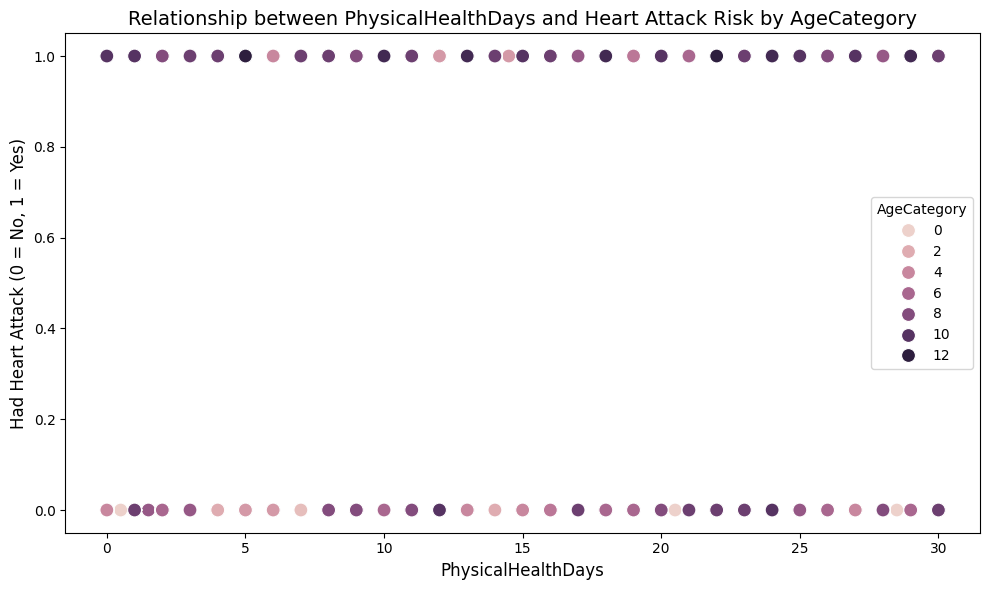

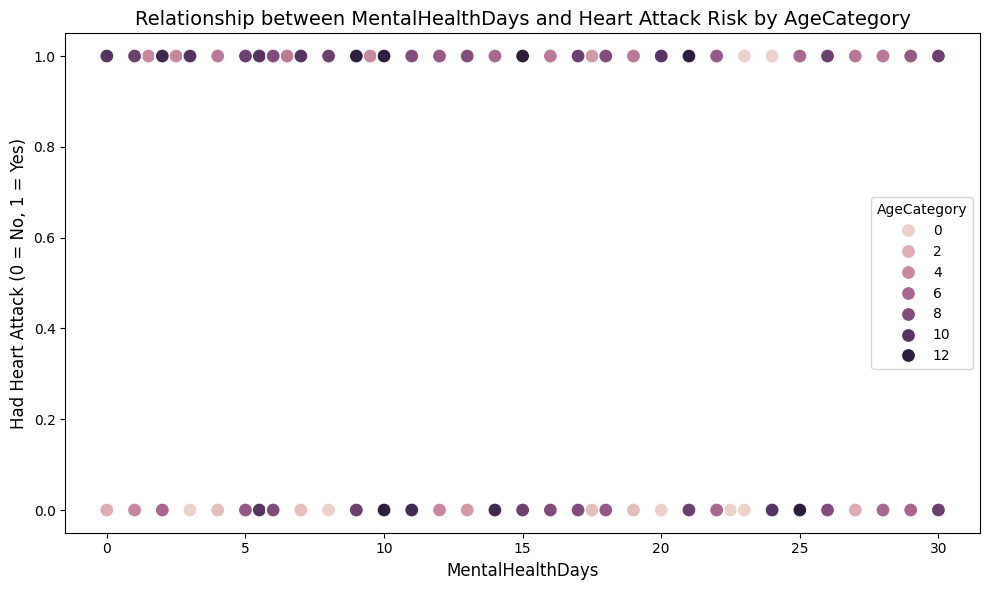

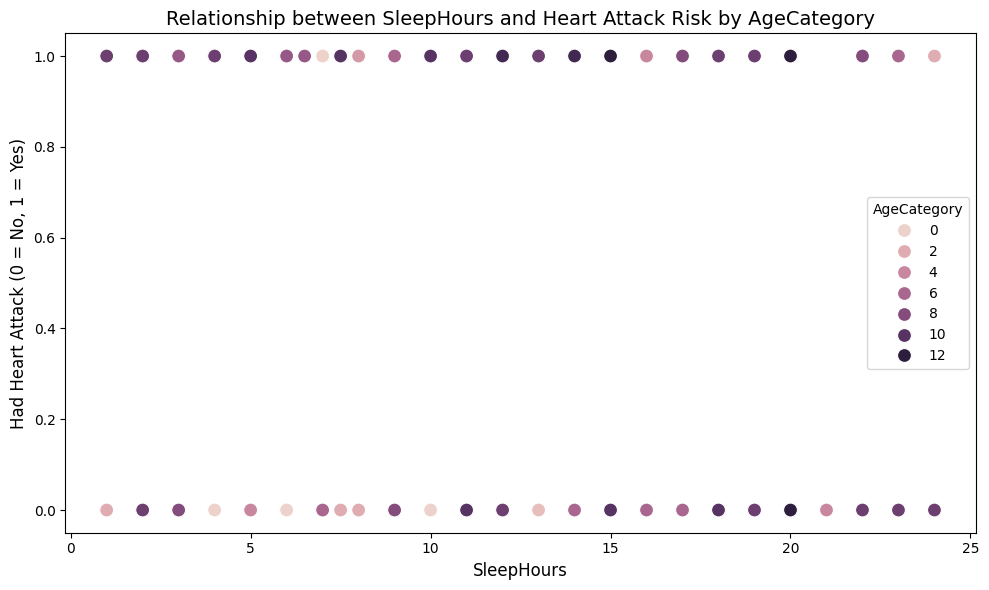

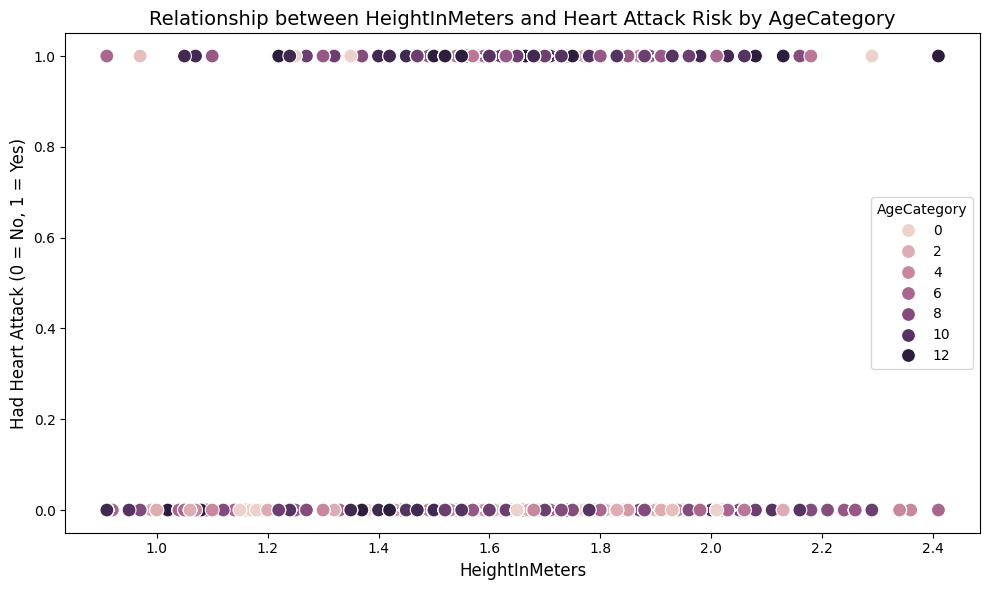

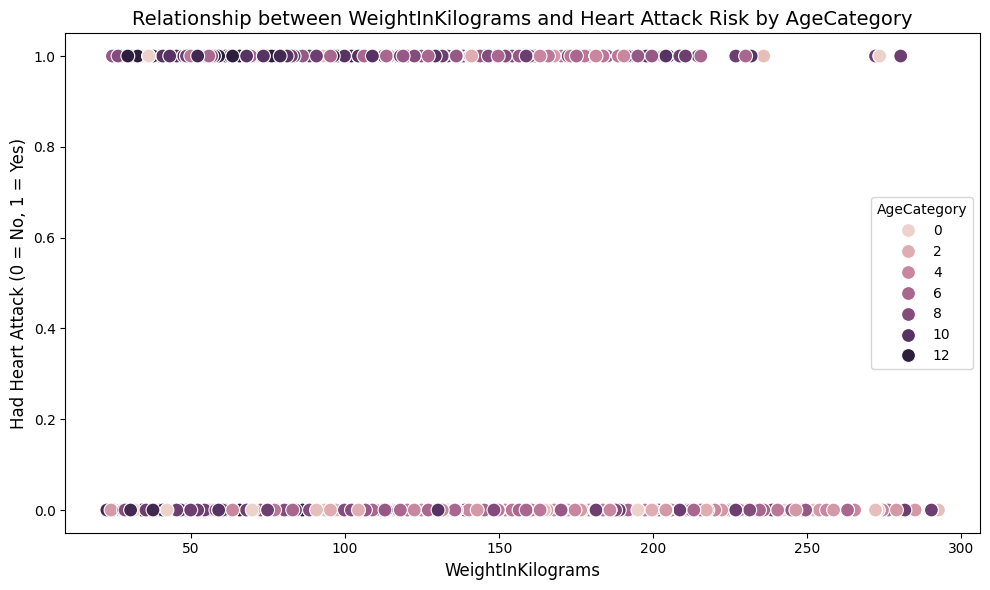

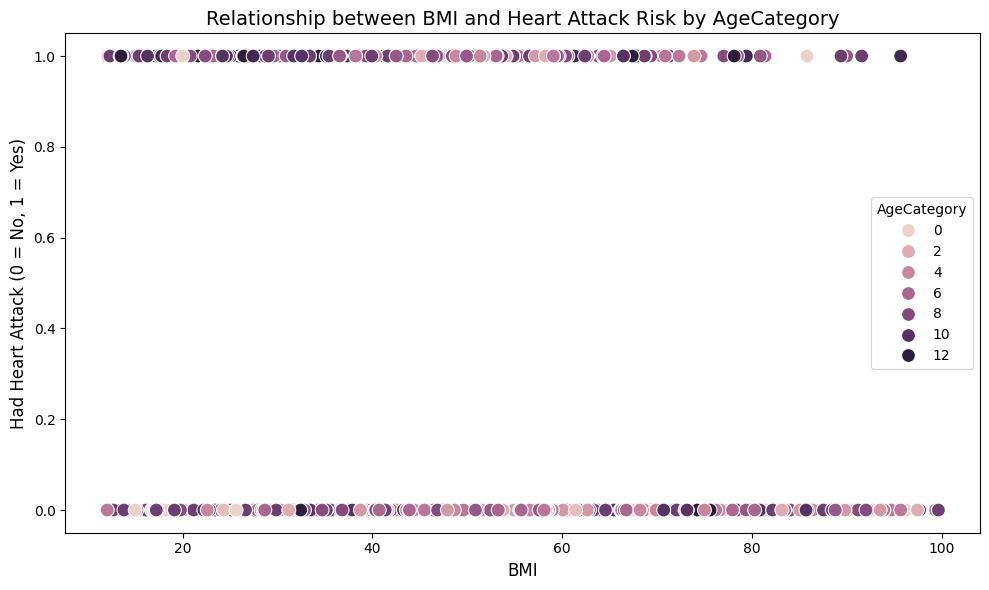

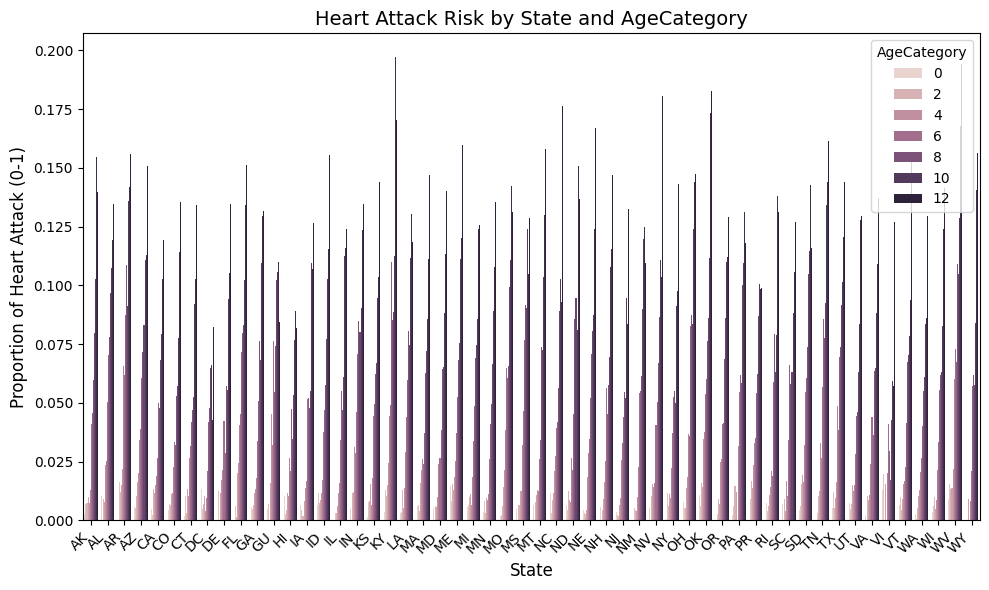

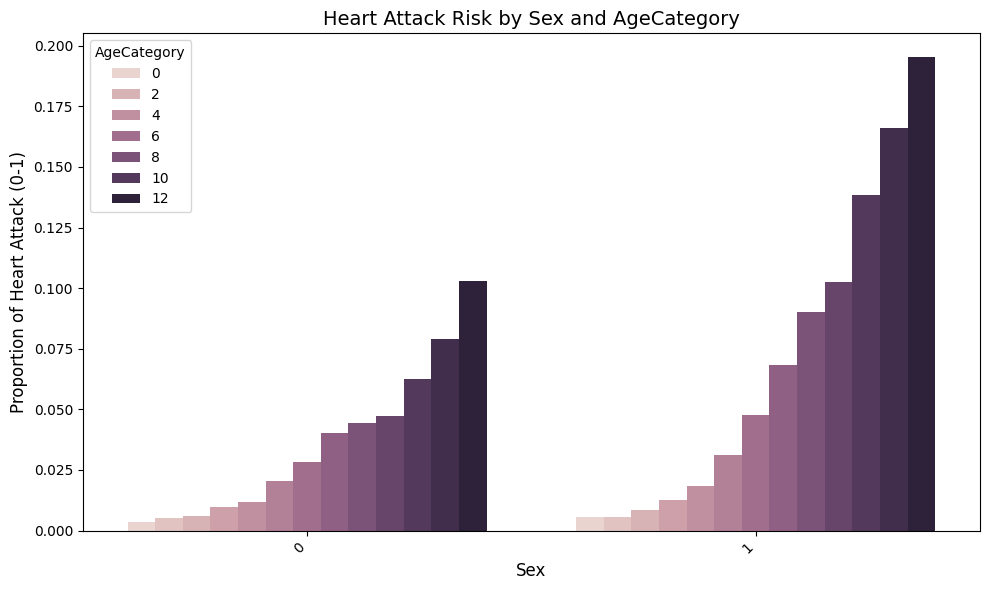

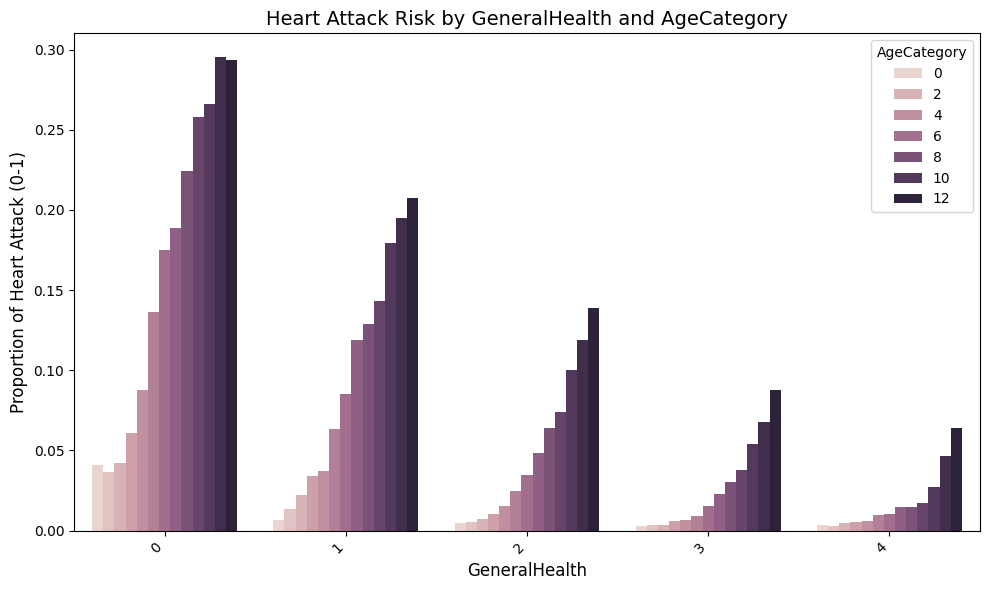

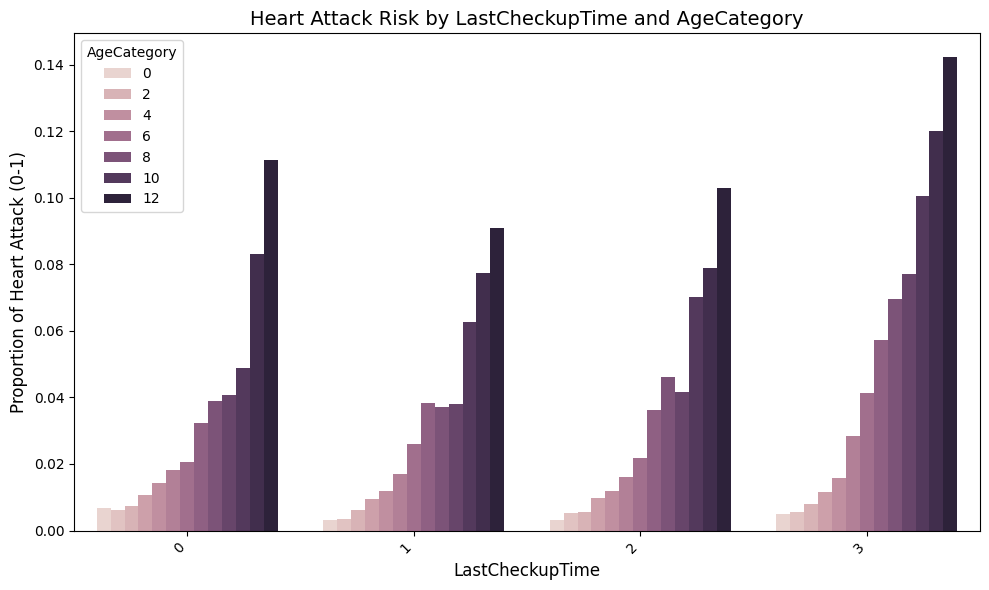

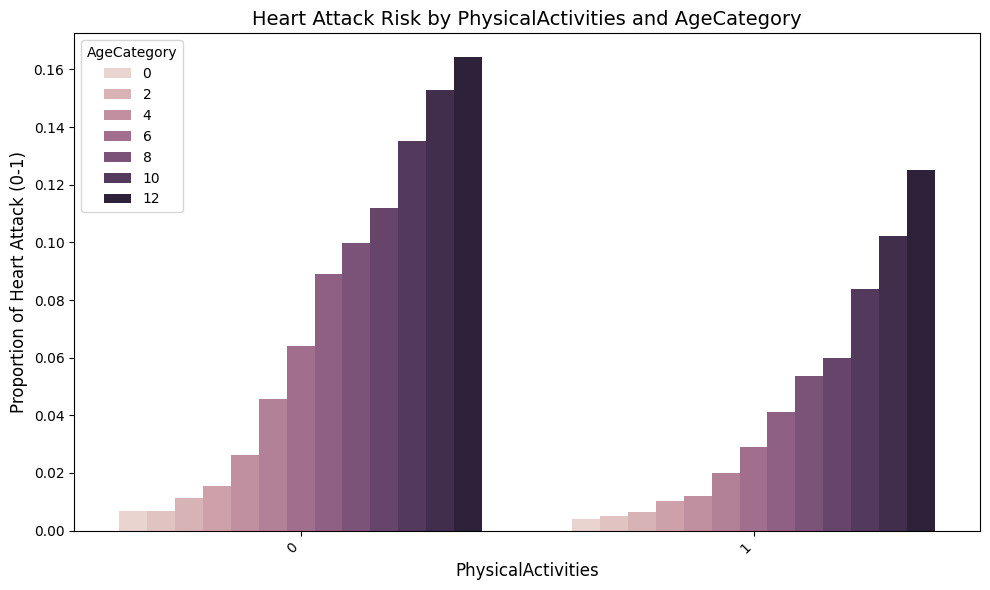

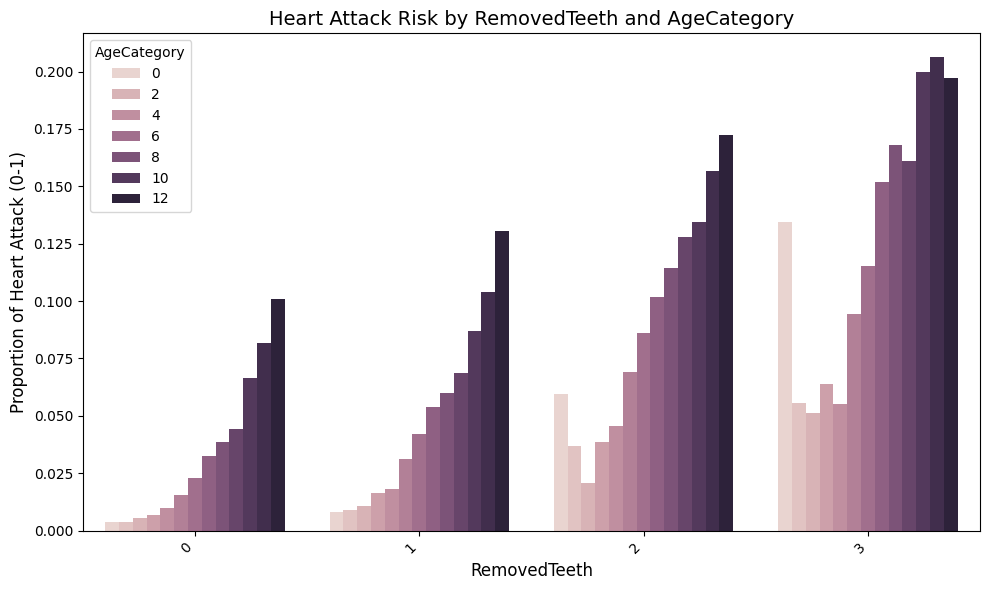

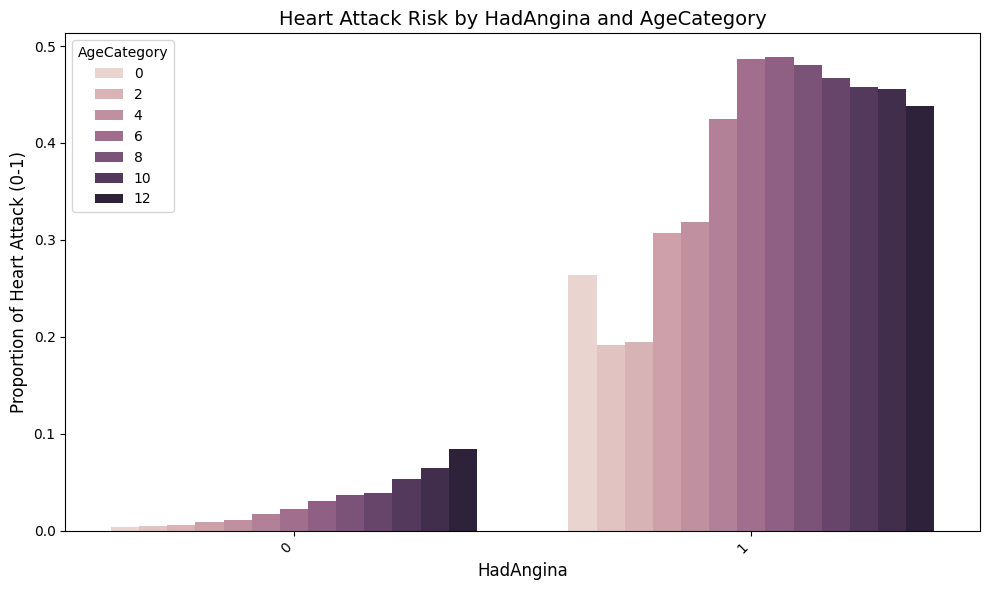

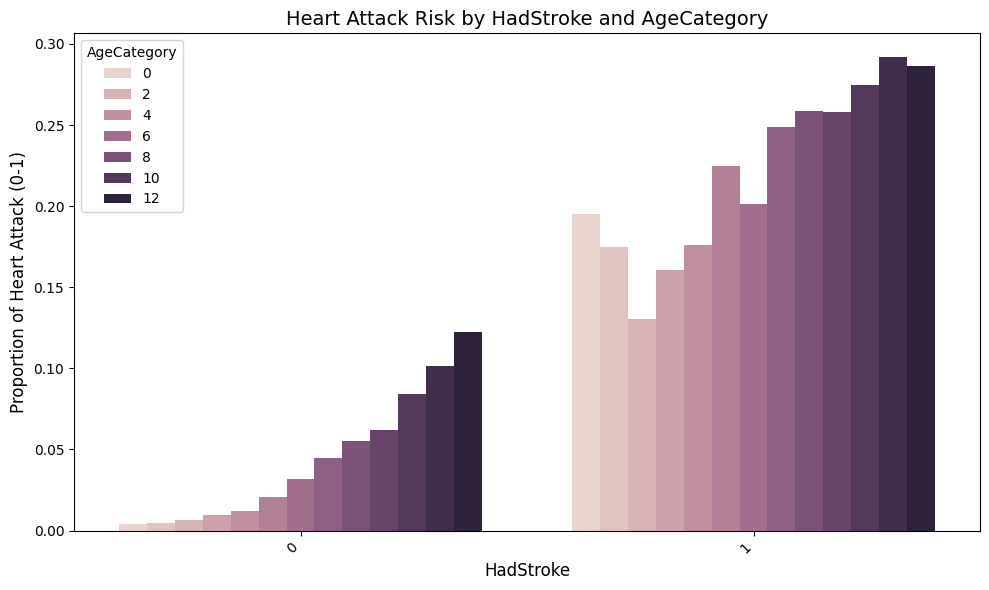

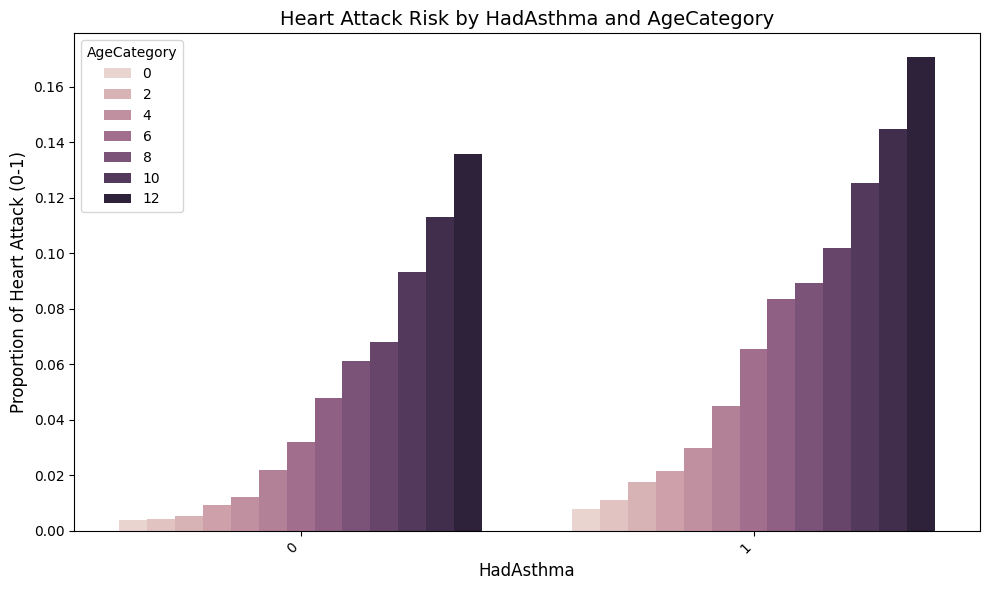

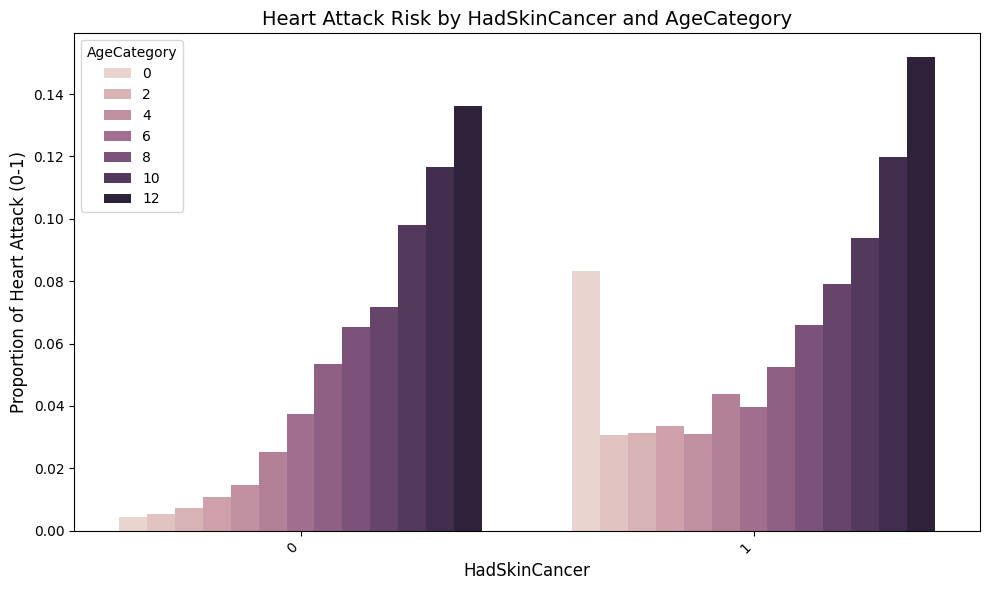

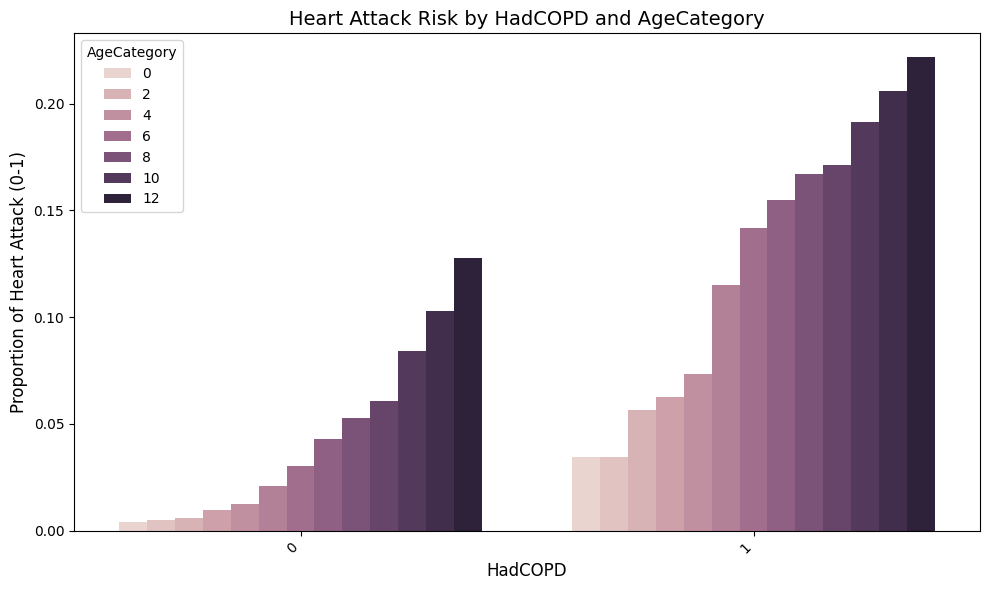

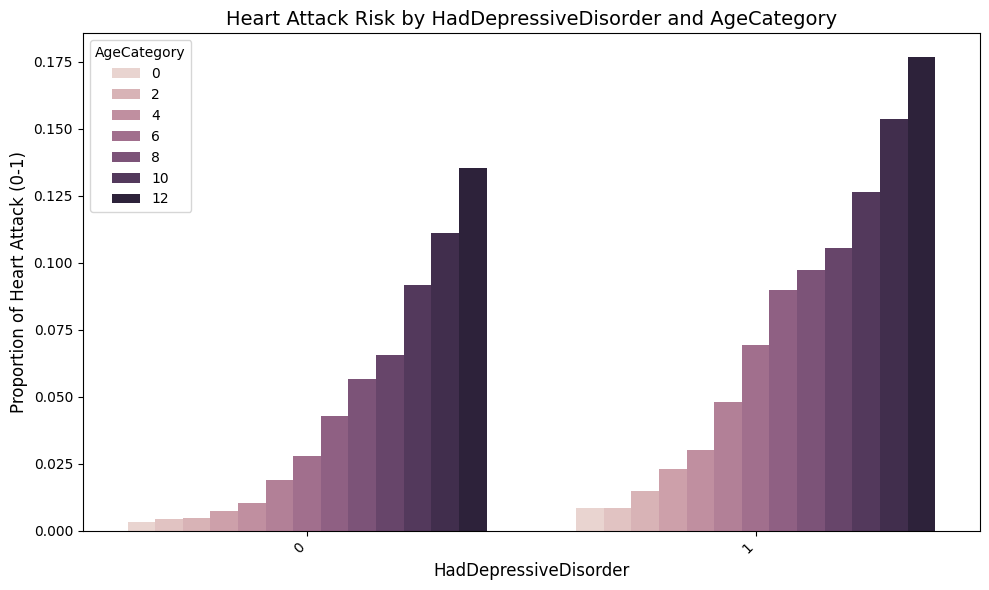

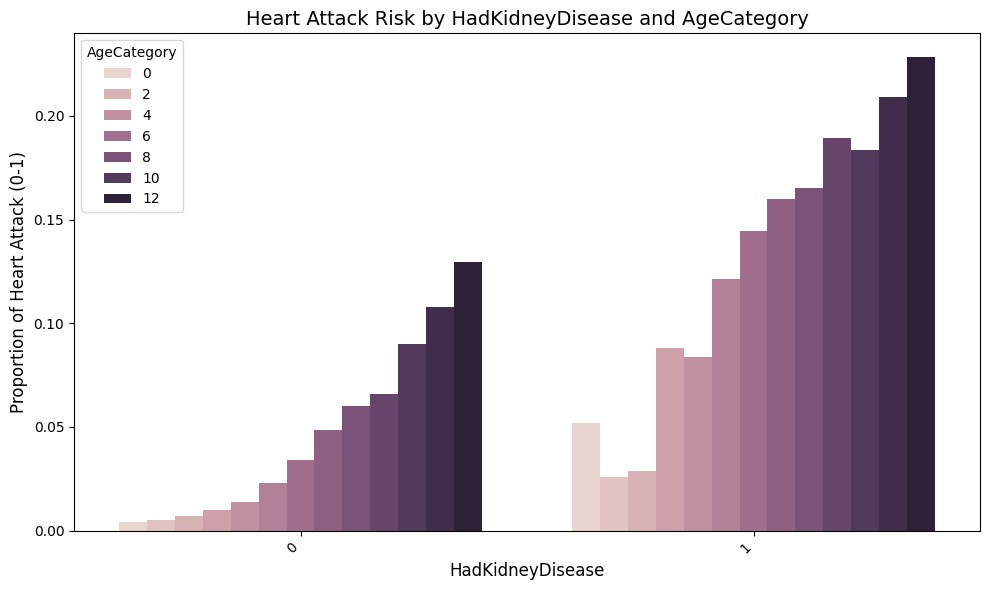

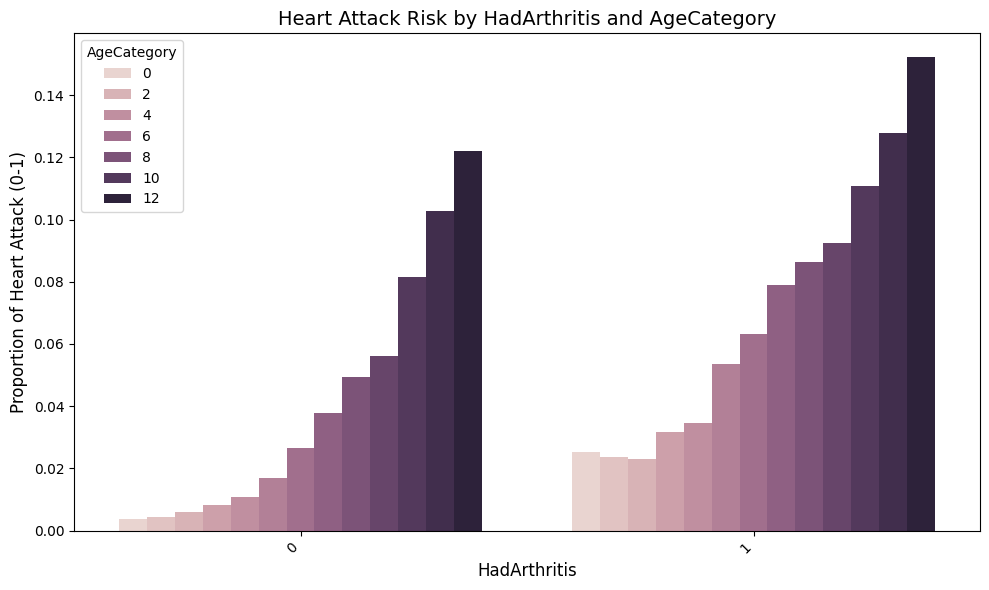

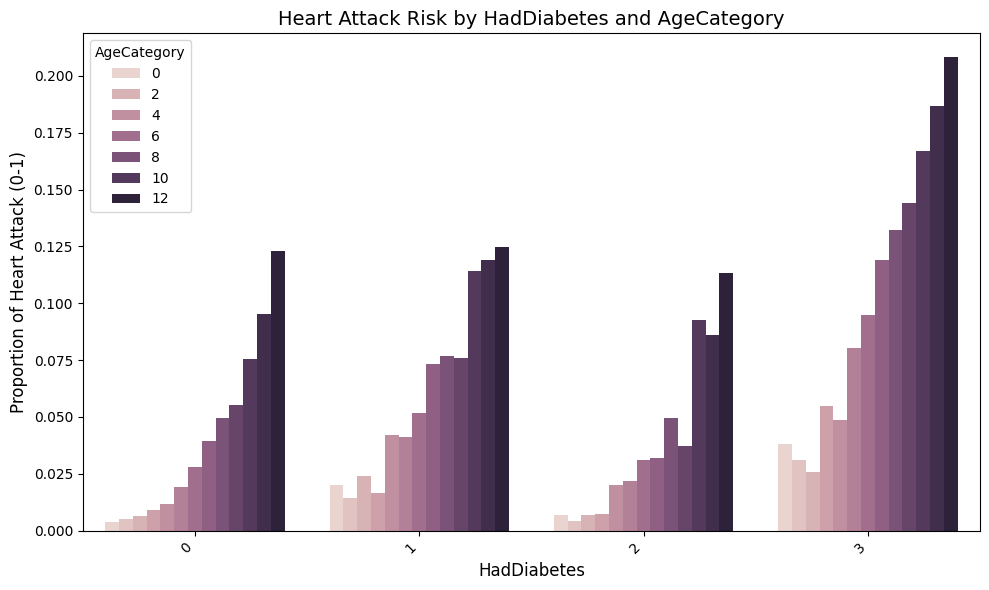

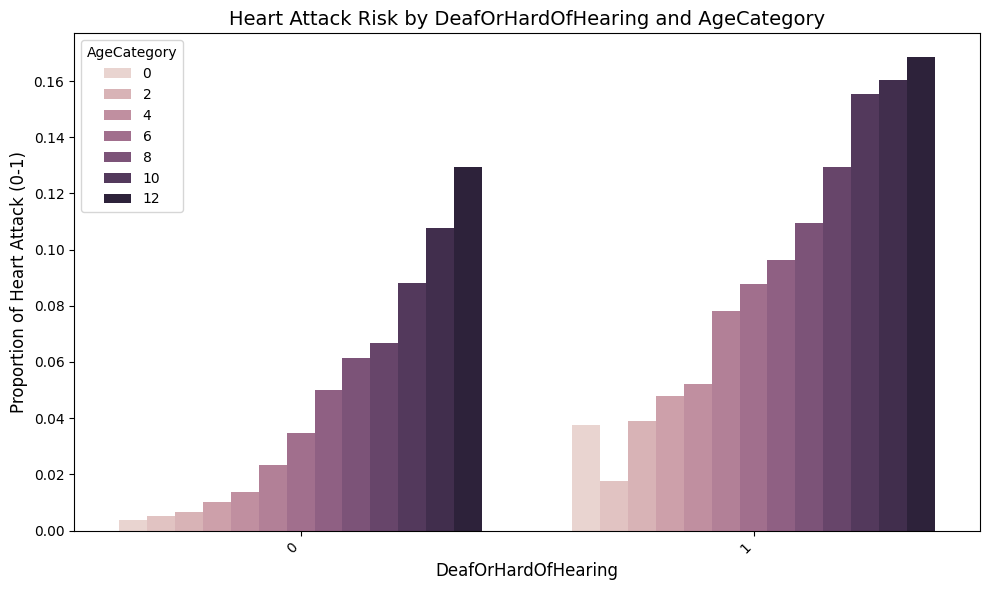

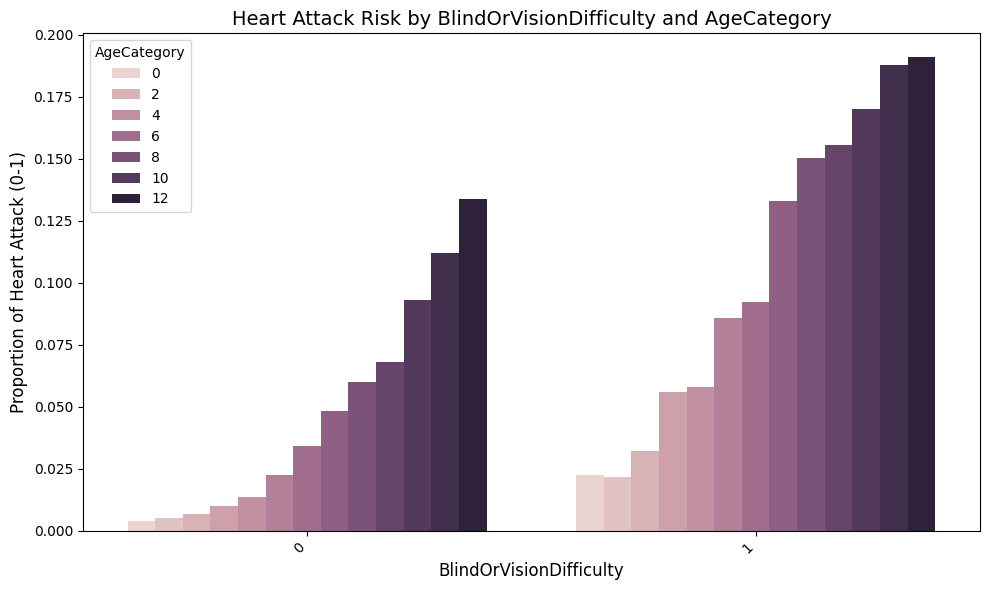

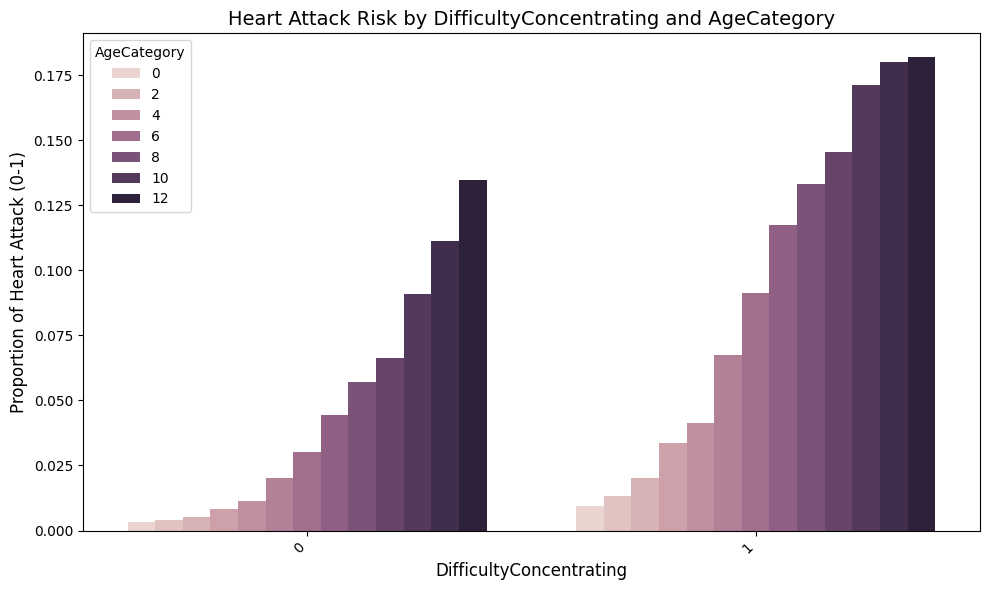

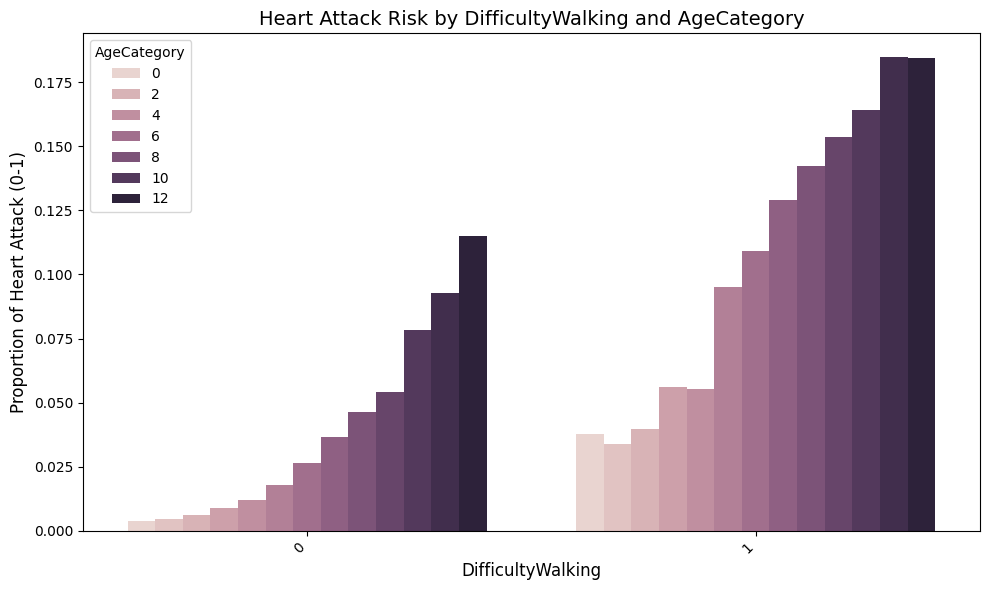

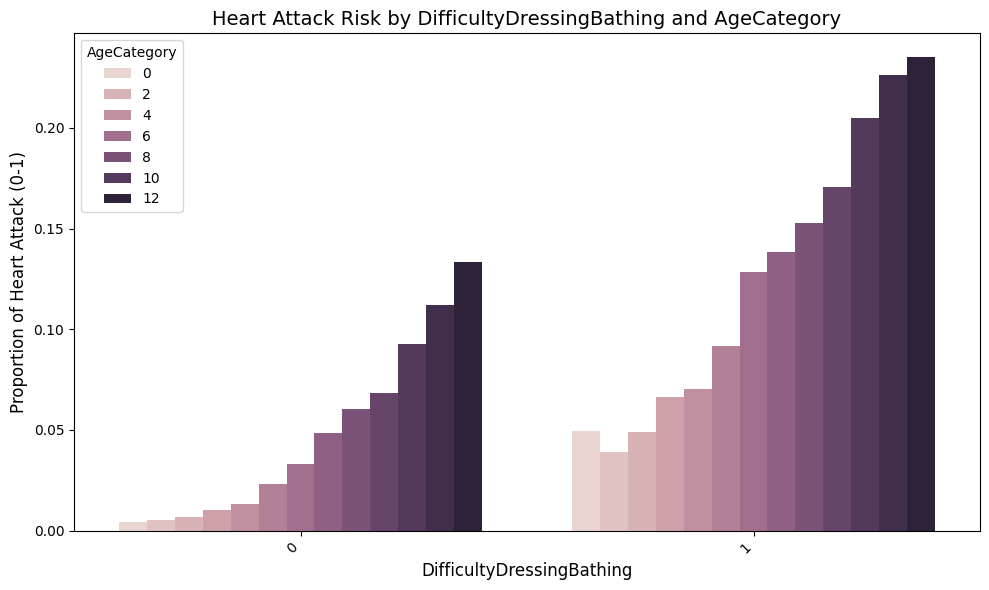

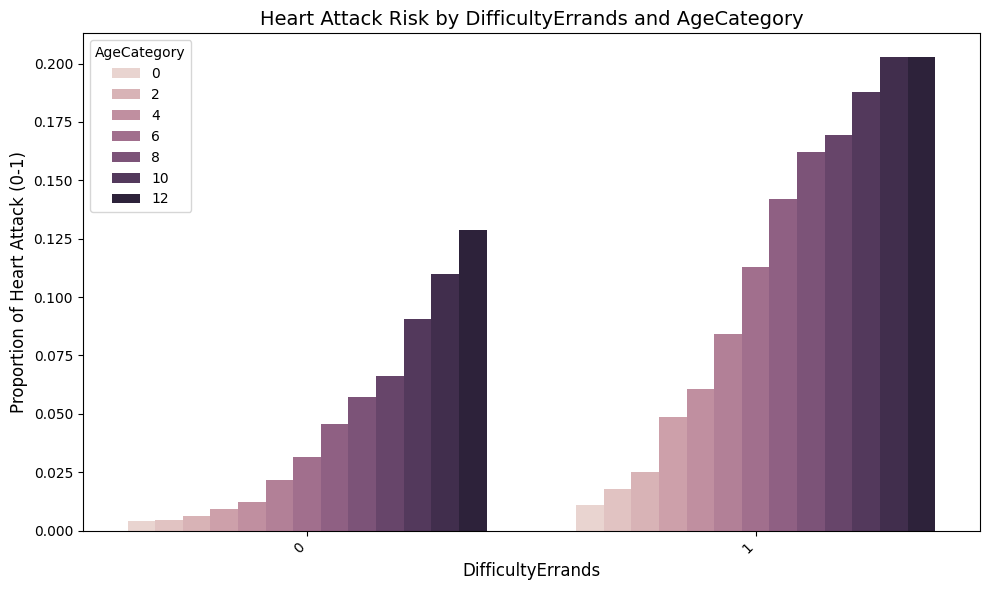

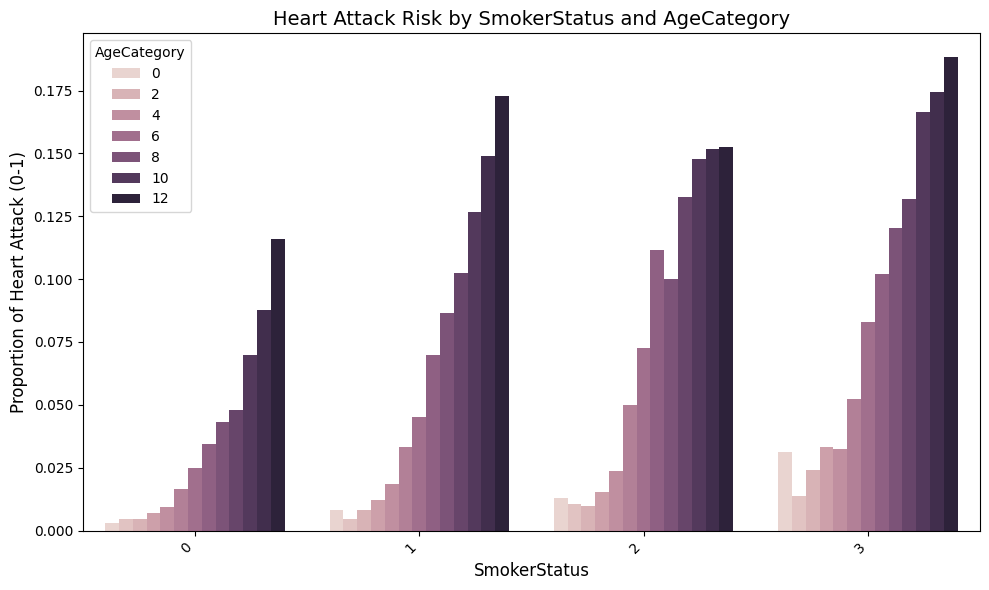

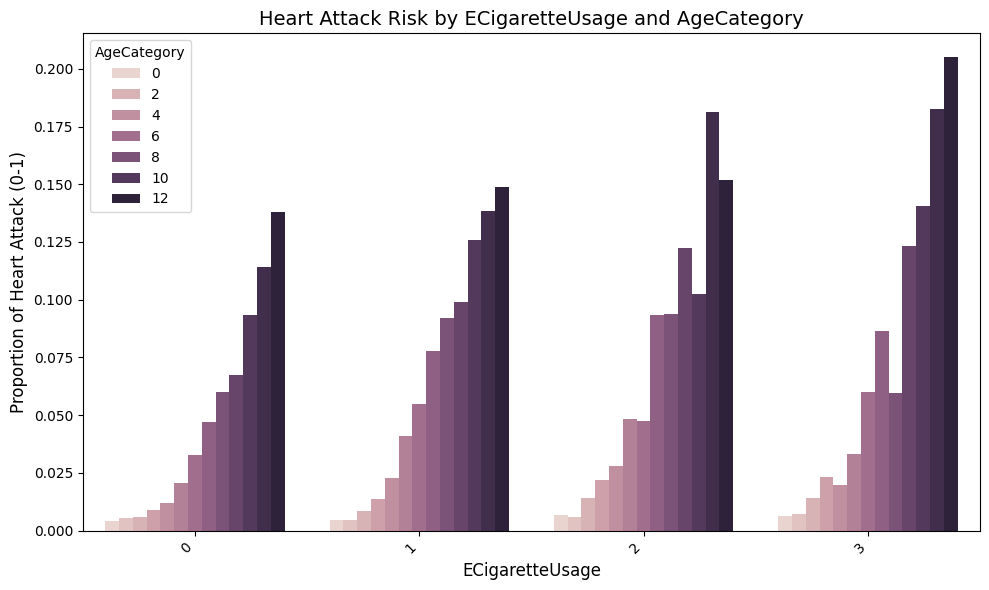

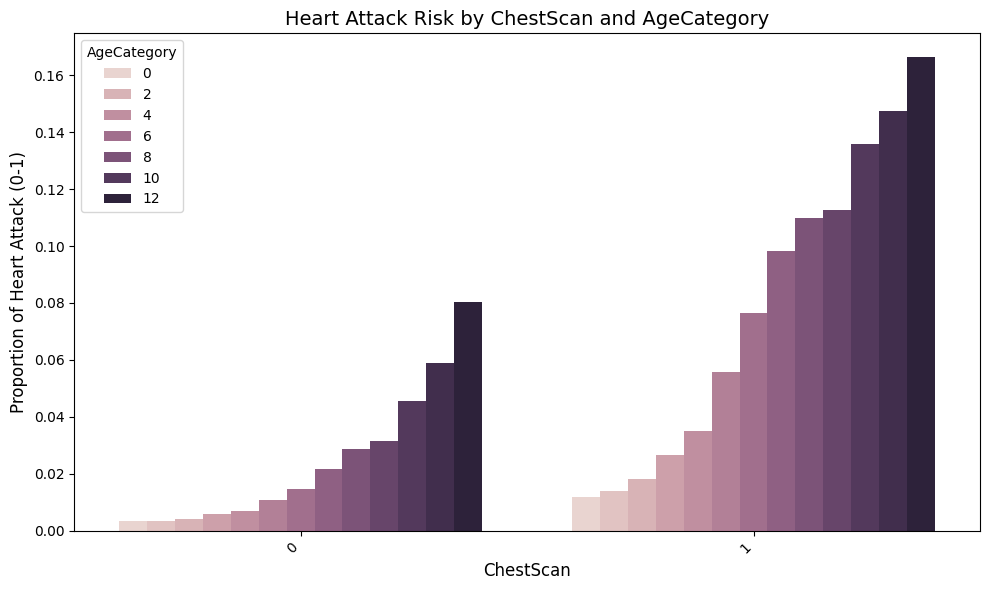

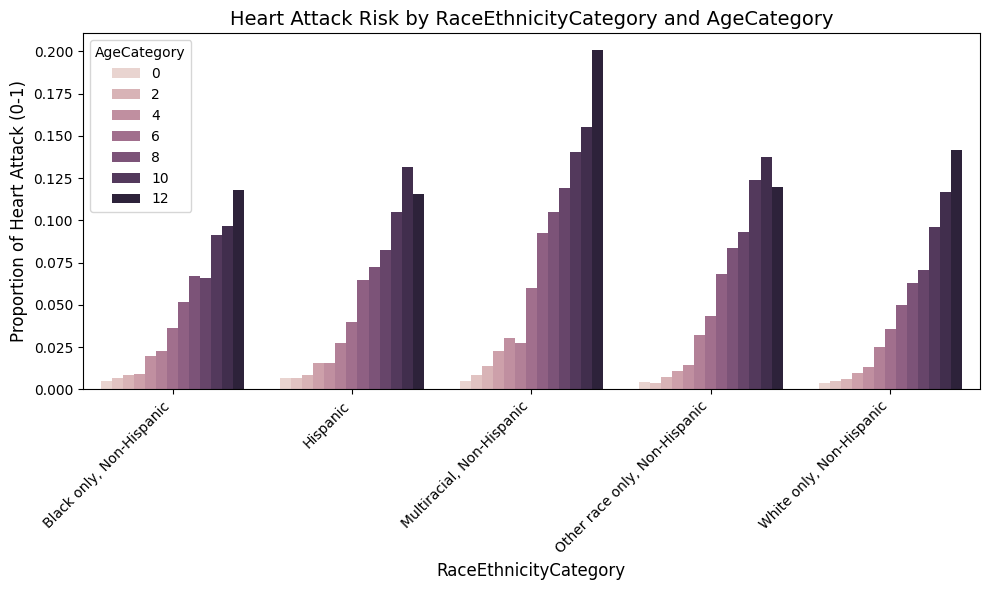

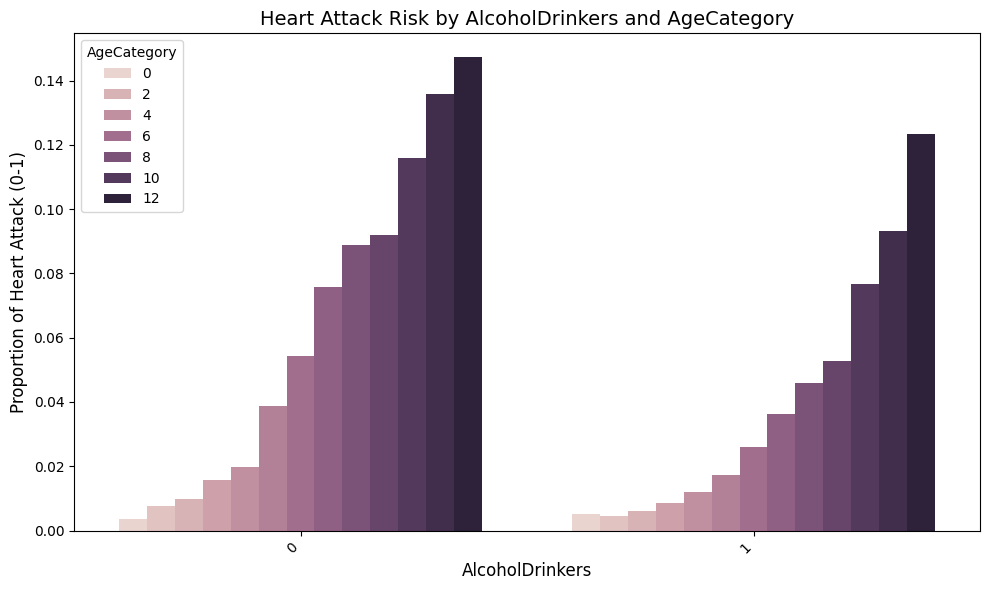

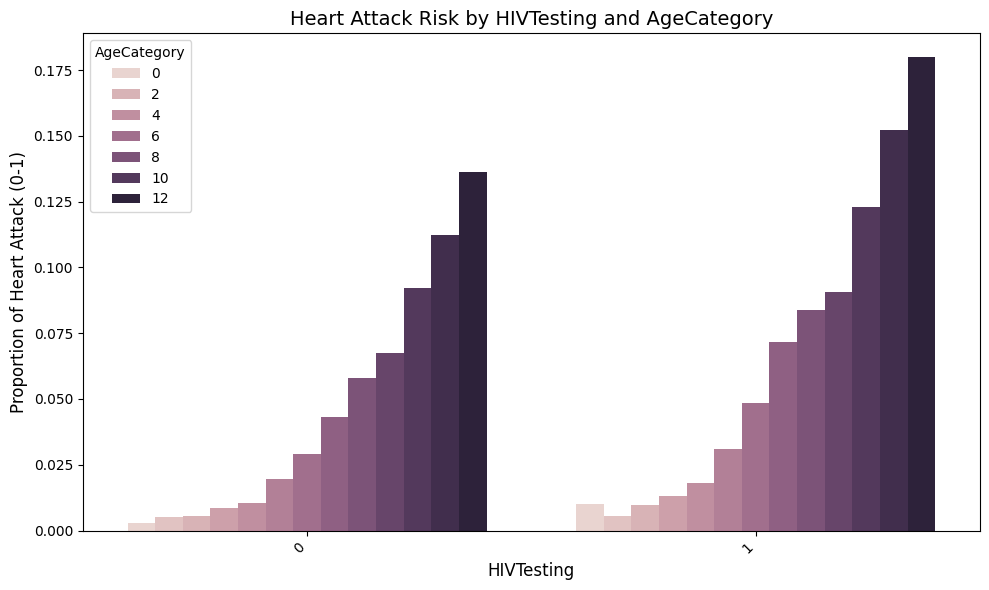

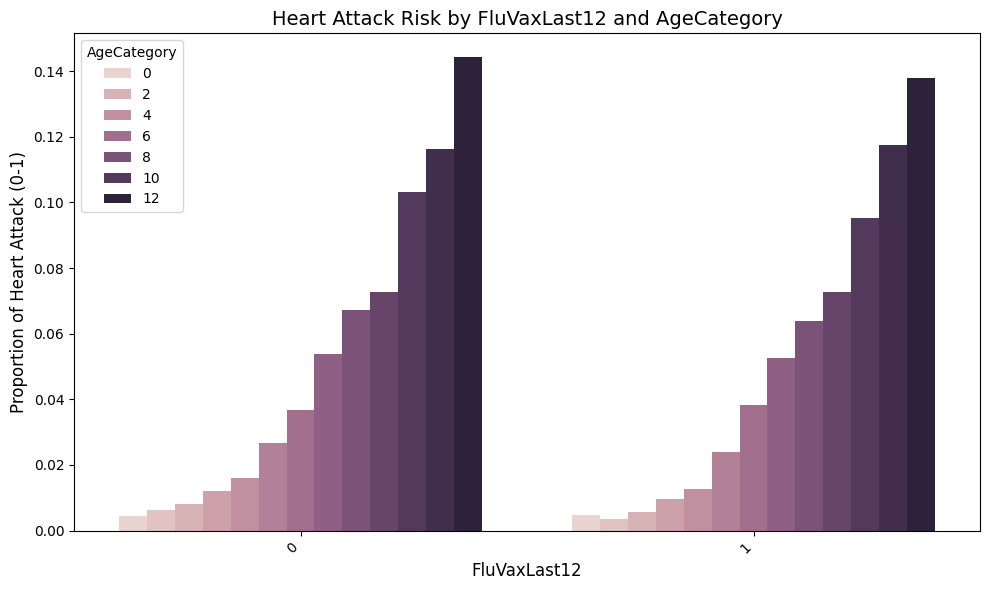

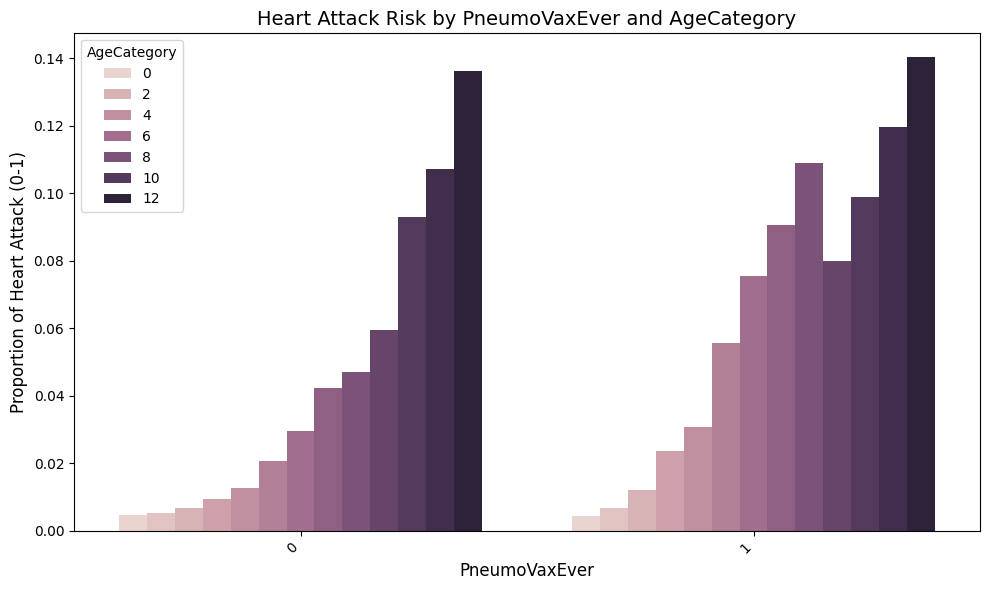

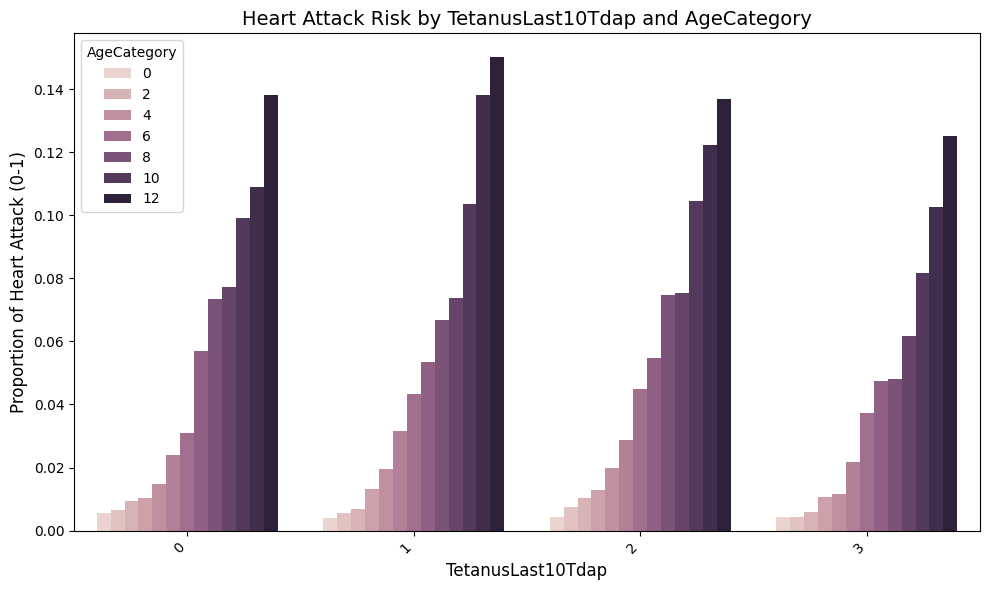

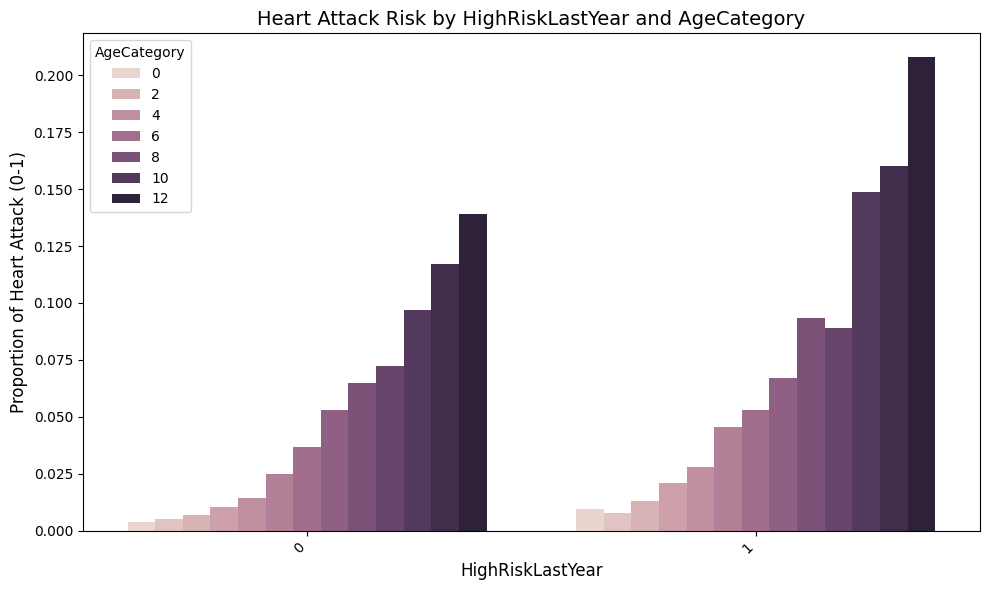

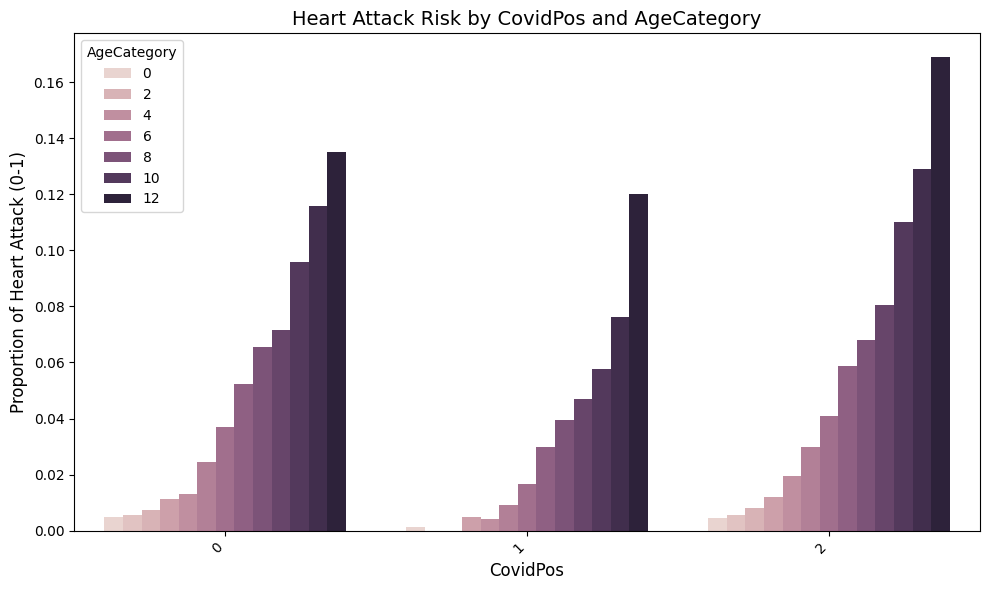

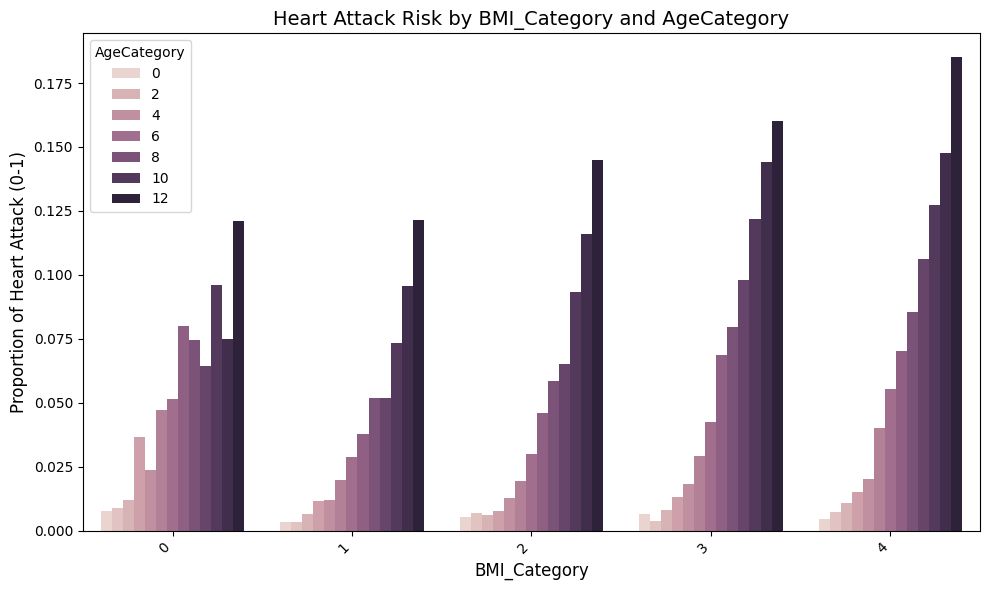

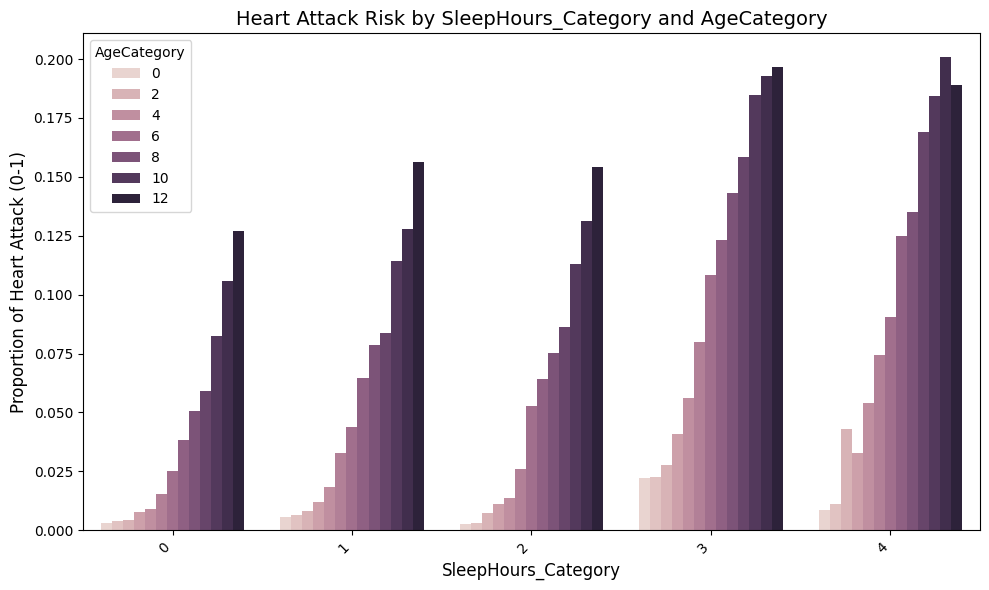

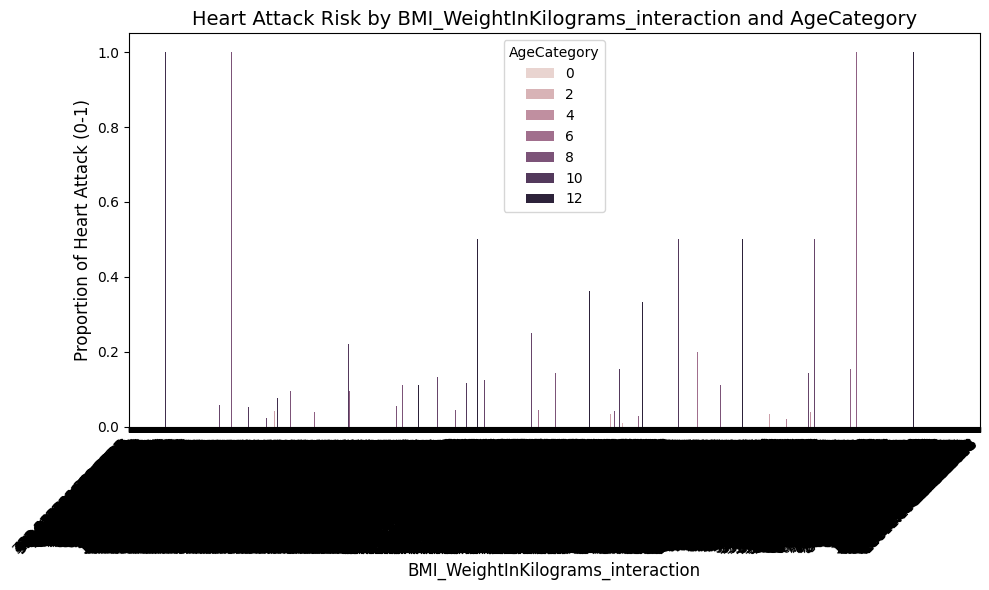

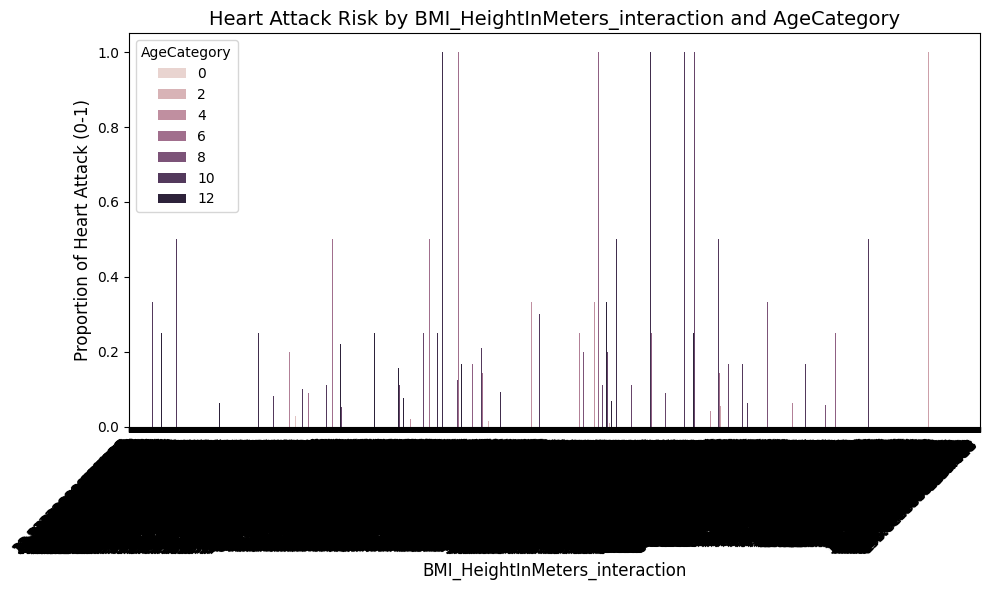

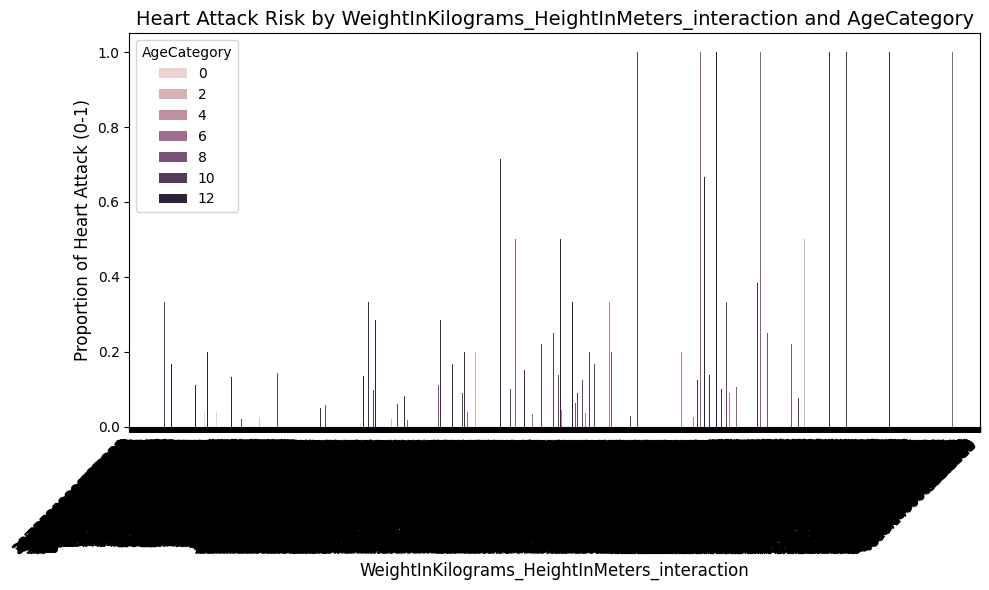

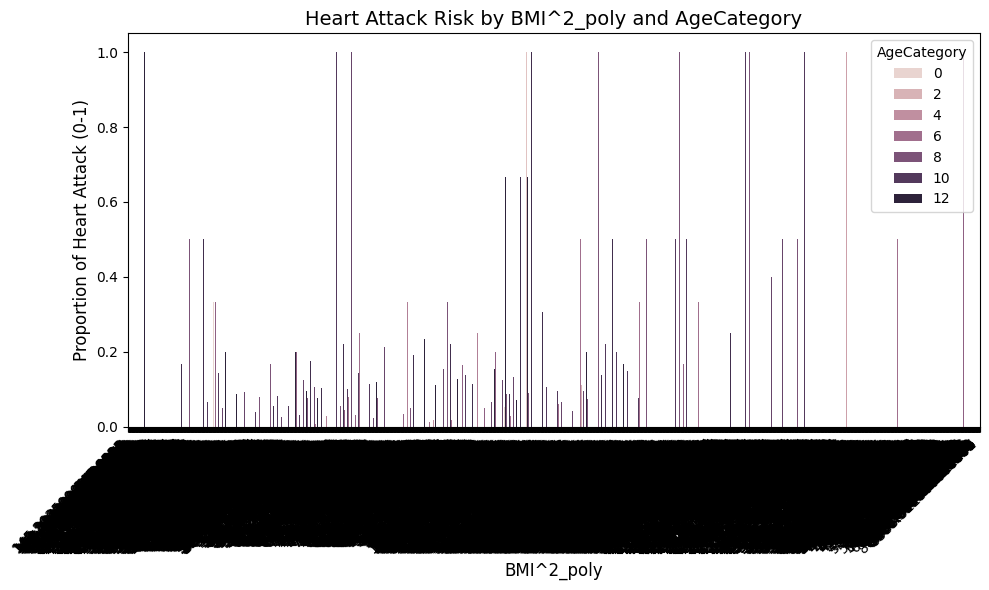

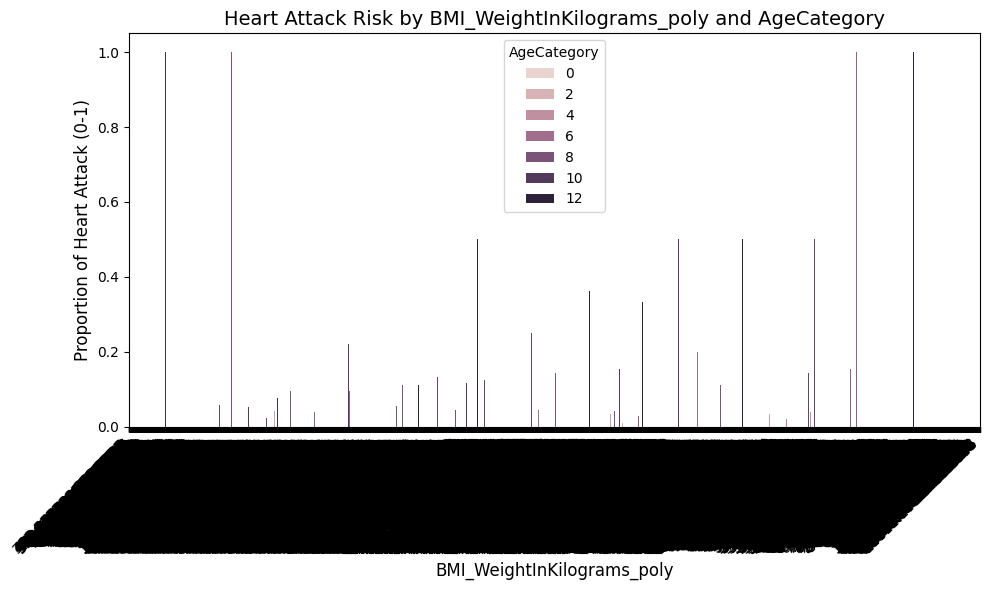

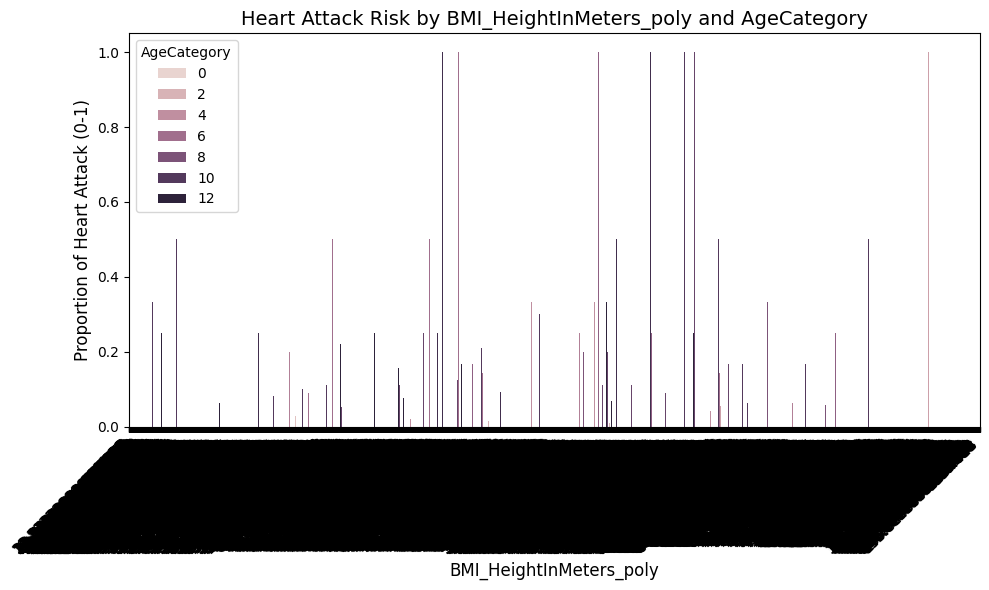

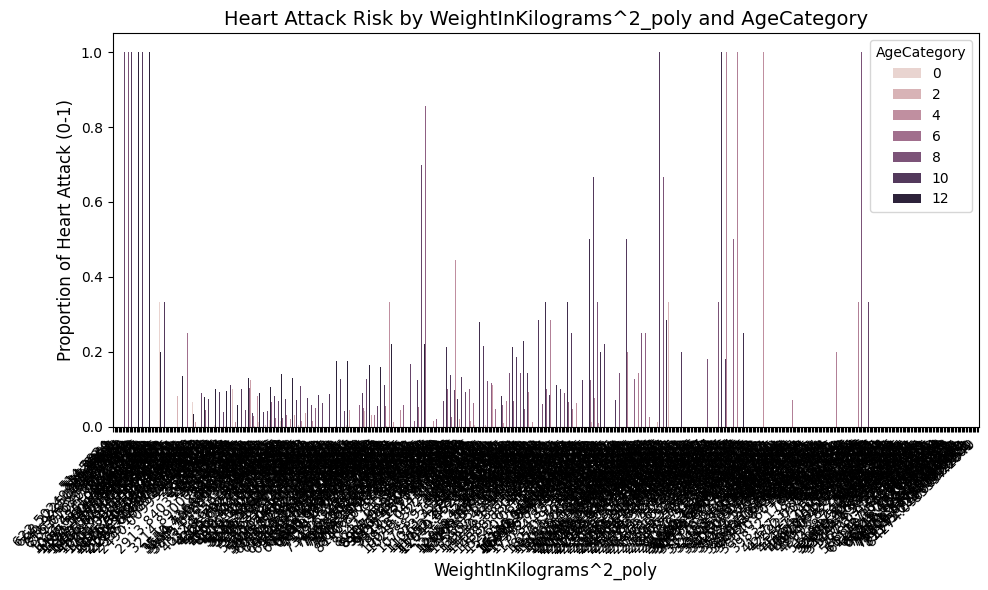

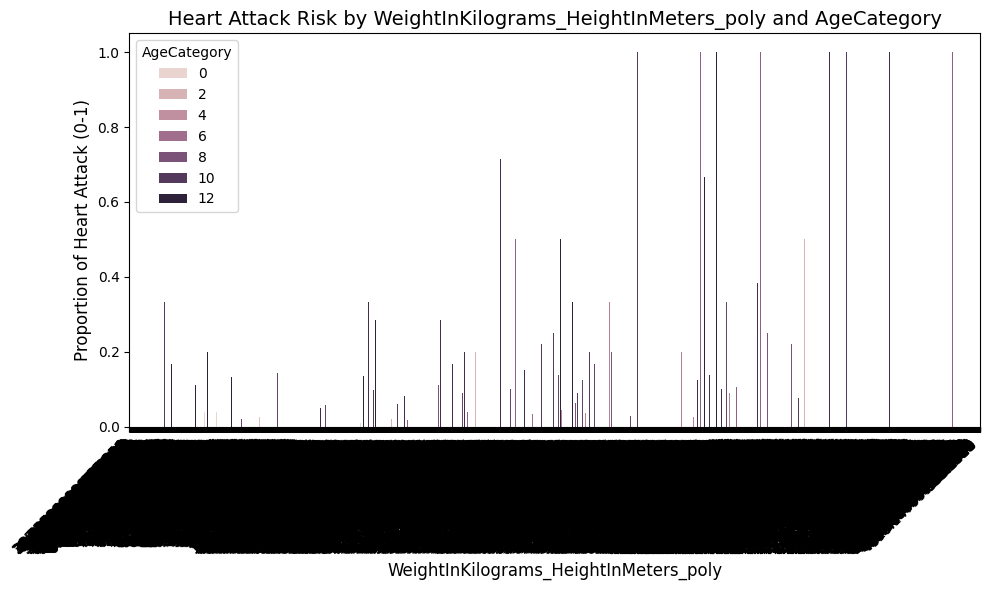

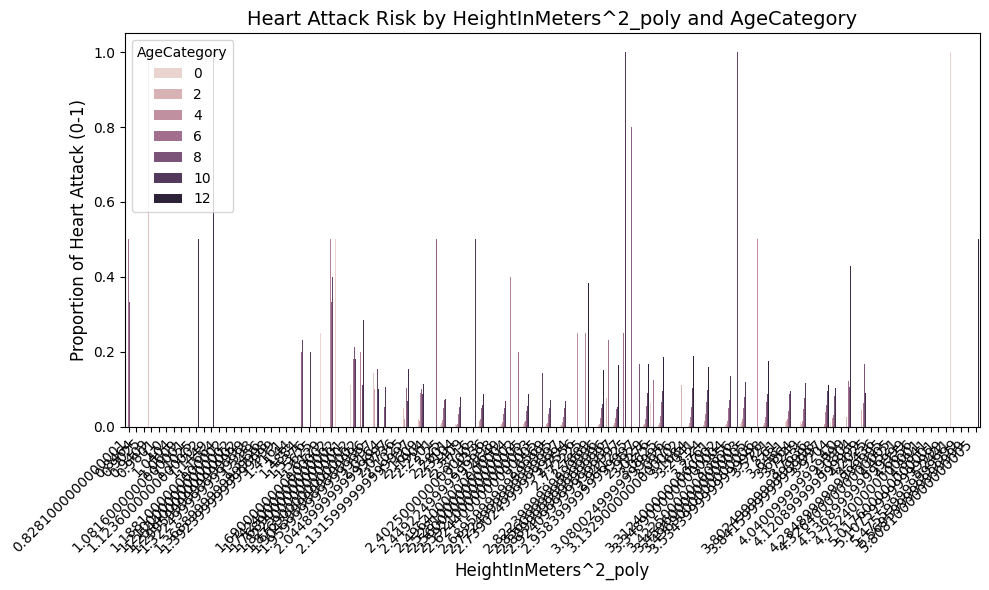

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# 定義特徵列表和目標變數
features = df.drop(columns="HadHeartAttack")
target = 'HadHeartAttack'

# 選擇一個主要分類變數作為交互基準
interaction_base = 'AgeCategory'

# 定義連續變數和分類變數
continuous_vars = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']
categorical_vars = [f for f in features if f not in continuous_vars and f != interaction_base]

# 1. 連續變數：散點圖觀察交互作用（與AgeCategory）
for feature in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y=target, hue=interaction_base, s=100)
    plt.title(f'Relationship between {feature} and Heart Attack Risk by {interaction_base}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Had Heart Attack (0 = No, 1 = Yes)', fontsize=12)
    plt.legend(title=interaction_base)
    plt.tight_layout()
    plt.show()

# 2. 分類變數：分組條形圖觀察交互作用（與 AgeCategory）
for feature in categorical_vars:
    plt.figure(figsize=(10, 6))
    # 計算每個組合下的心臟病比例
    grouped = df.groupby([feature, interaction_base])[target].mean().reset_index()
    sns.barplot(data=grouped, x=feature, y=target, hue=interaction_base)
    plt.title(f'Heart Attack Risk by {feature} and {interaction_base}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Proportion of Heart Attack (0-1)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=interaction_base)
    plt.tight_layout()
    plt.show()

In [7]:
df["Sex_Age"] = df["Sex"] * df["AgeCategory"]
df["Weight_MentalHealthDays"] = df["WeightInKilograms"] * df["MentalHealthDays"]
df["Sex_Diabetes"] = df["Sex"] * df["HadDiabetes"]
df["AgeCategory_Diabetes"] = df["AgeCategory"] * df["HadDiabetes"]
df["BMI_Age"] = df["BMI"] * df["AgeCategory"] 
df["BMI_SleepHours"] = df["BMI"] * df["SleepHours"] 
df["SmokerStatus_Sex"] = df["SmokerStatus"] * df["Sex"]
df["SmokerStatus_Age"] = df["SmokerStatus"] * df["AgeCategory"]
df["PhysicalActivities_AgeCategory"] = df["PhysicalActivities"] * df["AgeCategory"]
df["PhysicalActivities_AgeCategory"] = df["PhysicalActivities"] * df["AgeCategory"]
df["AgeCategory_HadStroke"] = df["AgeCategory"] * df["HadStroke"]
df["Age_Ethnicity"] = df["AgeCategory"] * df["RaceEthnicityCategory"]

### 3. Feature Scaling

In [8]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['float64']).columns.tolist()

In [9]:
# Apply StandardScaler to the numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.sample(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,Weight_MentalHealthDays,Sex_Diabetes,AgeCategory_Diabetes,BMI_Age,BMI_SleepHours,SmokerStatus_Sex,SmokerStatus_Age,PhysicalActivities_AgeCategory,AgeCategory_HadStroke,Age_Ethnicity
257612,NM,0,2,0.076388,-0.519475,3,1,-0.684849,1,0,...,-0.491521,0,0,-0.181856,-0.481567,0,0,6,0,HispanicHispanicHispanicHispanicHispanicHispanic
298634,OH,0,4,0.653169,-0.279255,2,1,-0.015726,0,0,...,-0.290486,0,0,-0.713545,-0.017096,0,0,4,0,"White only, Non-HispanicWhite only, Non-Hispan..."
286147,OH,0,2,-0.269681,-0.519475,3,1,0.653398,1,0,...,-0.491521,0,0,0.986061,-0.046084,0,0,12,0,"Black only, Non-HispanicBlack only, Non-Hispan..."
274388,NY,1,2,-0.269681,3.083832,3,1,-0.684849,1,0,...,3.858111,0,0,-0.009872,-0.179167,1,6,6,0,"White only, Non-HispanicWhite only, Non-Hispan..."
280323,NC,1,2,2.960296,3.083832,1,1,-2.023097,1,0,...,2.615474,0,0,-1.774674,-1.527780,1,0,0,0,


### 4. Save the Engineered Dataset

In [10]:
output_path = '../data/cleaned/heart_2022_cleaned_02.csv'
df.to_csv(output_path, index=False)
print(f"Saved engineered dataset to {output_path}")

Saved engineered dataset to ../data/cleaned/heart_2022_cleaned_02.csv
